### Lectura del archivo

In [37]:
import pandas as pd

datos = pd.read_csv("altura_peso.csv", sep=",", skiprows=32, usecols=[0,1])
x = datos.iloc[:,0].values
y =  datos.iloc[:,1].values



### Creación del modelo

In [38]:
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.optimizers import SGD


modelo = Sequential()
input_dim = 1
output_dim = 1
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))


sgd = SGD(learning_rate=0.0004, clipvalue=1.0)

modelo.compile(loss='mse', optimizer=sgd)


modelo.summary()

c:\Users\IPF 2023\Desktop\linear-regression-keras\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Entranamiento del modelo

In [39]:
num_epochs = 10000
batch_size = x.shape[0]
historia = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size,
verbose=1)

Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 12432.7412
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12417.0225
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12401.3184
Epoch 4/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12385.6182
Epoch 5/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12369.9326
Epoch 6/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12354.2568
Epoch 7/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12338.5898
Epoch 8/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12322.9316
Epoch 9/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12307.2852
Epoch 10/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12291.6504
Epoch 11/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12276.0225
Epoch 12/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12260.4072
Epoch 13/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12244.7988
Epoch 14/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12229.2012


### Parámetros

In [40]:
capas = modelo.layers[0]  
w, b = capas.get_weights() 
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0], b[0]))


Parámetros: w = 0.5, b = -4.0


### Gráficos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


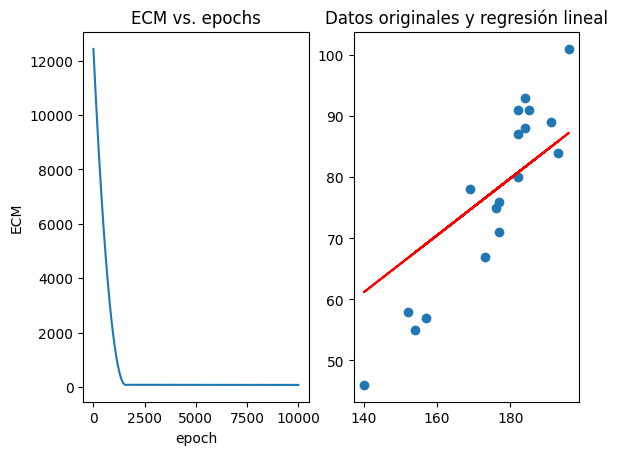

In [41]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')
y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.title('Datos originales y regresión lineal')
plt.show()


### Predicciones

In [43]:
import numpy as np

x_pred = np.array([164])
y_pred = modelo.predict(x_pred)
print("El peso será de {:.1f} kg".format(y_pred[0][0]), 
      "para una persona que mide {} cm".format(x_pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
El peso será de 72.4 kg para una persona que mide 164 cm
